# Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis =1)
y = df["sales"]

### Polynomial Conversion

In [5]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [7]:
poly_features.shape

(200, 55)

### Train | Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [14]:
# X_train

array([[1.93200000e+02, 1.84000000e+01, 6.57000000e+01, ...,
        9.60133791e+07, 3.42830381e+08, 1.22412804e+09],
       [2.87600000e+02, 4.30000000e+01, 7.18000000e+01, ...,
        6.84400383e+08, 1.14278948e+09, 1.90819266e+09],
       [8.02000000e+01, 0.00000000e+00, 9.20000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.59081523e+04],
       ...,
       [2.39800000e+02, 4.10000000e+00, 3.69000000e+01, ...,
        8.44591705e+05, 7.60132535e+06, 6.84119281e+07],
       [2.14700000e+02, 2.40000000e+01, 4.00000000e+00, ...,
        3.68640000e+04, 6.14400000e+03, 1.02400000e+03],
       [1.63300000e+02, 3.16000000e+01, 5.29000000e+01, ...,
        1.47822717e+08, 2.47462713e+08, 4.14265112e+08]])

In [16]:
# y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [17]:
# X_test

array([[7.47000000e+01, 4.94000000e+01, 4.57000000e+01, ...,
        2.32917703e+08, 2.15472450e+08, 1.99333825e+08],
       [2.55400000e+02, 2.69000000e+01, 5.50000000e+00, ...,
        1.20390614e+05, 2.46151812e+04, 5.03284375e+03],
       [1.12900000e+02, 1.74000000e+01, 3.86000000e+01, ...,
        1.74124712e+07, 3.86276659e+07, 8.56912589e+07],
       ...,
       [3.95000000e+01, 4.11000000e+01, 5.80000000e+00, ...,
        3.29585142e+05, 4.65107986e+04, 6.56356768e+03],
       [2.65600000e+02, 2.00000000e+01, 3.00000000e-01, ...,
        1.08000000e+01, 1.62000000e-01, 2.43000000e-03],
       [1.75100000e+02, 2.25000000e+01, 3.15000000e+01, ...,
        1.58232867e+07, 2.21526014e+07, 3.10136420e+07]])

In [18]:
# y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

## Scaling the Data

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [20]:
X_train = scaler.transform(X_train)

In [22]:
X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [25]:
pd.DataFrame(X_train).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
pd.DataFrame(X_test).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [28]:
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lm.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [33]:
y_train_pred = lm.predict(X_train)

In [34]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9976072485267145
MAE 		: 0.18621293136505104
MSE 		: 0.06296801889161846
RMSE 		: 0.25093429198022826


In [35]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7649897681642943
MAE 		: 0.6659594307588766
MSE 		: 6.634847380751415
RMSE 		: 2.57581974927428


In [36]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,0.250934,2.575820
mae,0.186213,0.665959
mse,0.062968,6.634847
R2,0.997607,0.764990


## Multicolineratiy

In [39]:
def color_red(corr):
    
    if corr > 0.90 and corr < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [40]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

## Cross Validate

In [41]:
from sklearn.model_selection import cross_validate, cross_val_score

In [47]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [46]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.018001,0.008014,-0.280734,-1.994430,-31.328119,-5.597153
2,0.015978,0.005004,0.993019,-0.377066,-0.250648,-0.500647
3,0.018003,0.007011,0.983934,-0.392312,-0.306241,-0.553391
4,0.016982,0.004998,0.825272,-0.979767,-4.402358,-2.098180
5,0.018005,0.005002,0.991181,-0.322253,-0.166869,-0.408496
6,0.014000,0.004996,0.969012,-0.484493,-0.976815,-0.988339
7,0.014002,0.004009,0.992885,-0.327955,-0.144808,-0.380536
8,0.015997,0.005996,0.990130,-0.447015,-0.332058,-0.576244
9,0.015003,0.003991,0.965508,-0.465024,-0.528863,-0.727230
10,0.014012,0.003995,0.990123,-0.324433,-0.197801,-0.444748


In [50]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.842033
test_neg_mean_absolute_error       -0.611475
test_neg_mean_squared_error        -3.863458
test_neg_root_mean_squared_error   -1.227496
dtype: float64

In [51]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7649897681642943
MAE 		: 0.6659594307588766
MSE 		: 6.634847380751415
RMSE 		: 2.57581974927428


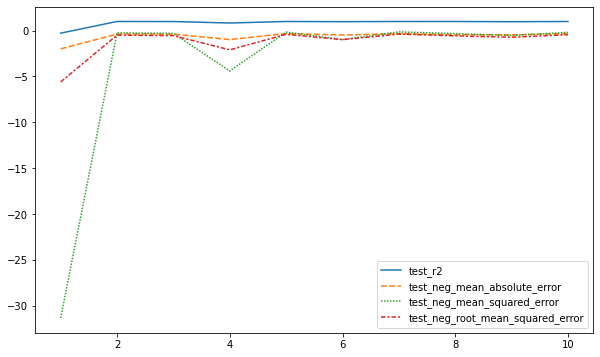

In [52]:
sns.lineplot(data = scores.iloc[:,2:]);

In [78]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [79]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df.sort_values(by='lm_coef', ascending =False)

,lm_coef
9,115.503087
23,39.849162
34,34.742828
20,28.837309
30,23.111981
33,22.775684
17,22.723785
29,22.095444
11,20.257596
36,18.231022


In [77]:
lm_df.sum()

lm_coef    5.698063
dtype: float64

In [64]:
lm_df.shape

(55, 1)

In [65]:
X_train.shape

(140, 55)

In [66]:
y_train.shape

(140,)

In [67]:
X_test.shape

(60, 55)

## Ridge Regression

In [80]:
from sklearn.linear_model import Ridge

In [81]:
ridge_model = Ridge(alpha=1)

In [82]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [83]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9825113234815026
MAE 		: 0.48244626387334816
MSE 		: 0.4937431816699796
RMSE 		: 0.7026686144050975


In [84]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9886773159501692
MAE 		: 0.33814926534101813
MSE 		: 0.29796950962675145
RMSE 		: 0.5458658348227625


In [85]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,0.545866,0.702669
mae,0.338149,0.482446
mse,0.297970,0.493743
R2,0.988677,0.982511


In [86]:
pd.concat([ls, rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,0.250934,2.575820,0.545866,0.702669
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
R2,0.997607,0.764990,0.988677,0.982511


## For Ridge Regression CV with alpha : 1 

In [87]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [88]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.989194,-0.430312,-0.264330,-0.514130
2,0.988294,-0.399467,-0.420281,-0.648291
3,0.980399,-0.419370,-0.373627,-0.611250
4,0.965854,-0.656779,-0.860334,-0.927542
5,0.991450,-0.343240,-0.161785,-0.402224
6,0.919753,-0.723583,-2.529543,-1.590454
7,0.993011,-0.290596,-0.142237,-0.377144
8,0.990300,-0.434471,-0.326317,-0.571241
9,0.975828,-0.443009,-0.370636,-0.608799
10,0.991642,-0.269488,-0.167392,-0.409136


<AxesSubplot:>

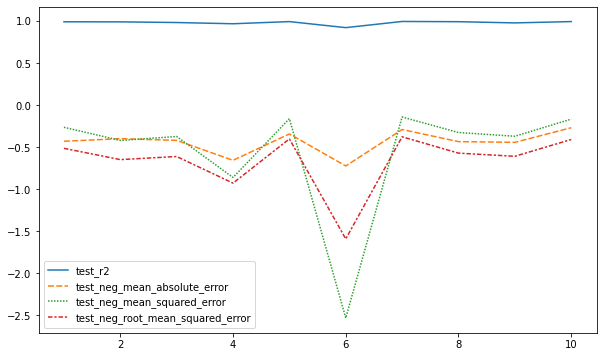

In [89]:
sns.lineplot(data = scores.iloc[:,2:])

In [90]:
pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:].mean()

test_r2                             0.978573
test_neg_mean_absolute_error       -0.441032
test_neg_mean_squared_error        -0.561648
test_neg_root_mean_squared_error   -0.666021
dtype: float64

In [91]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9825113234815026
MAE 		: 0.48244626387334816
MSE 		: 0.4937431816699796
RMSE 		: 0.7026686144050975


In [92]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [93]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [94]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


## Choosing best alpha value with Cross-Validation

In [95]:
from sklearn.linear_model import RidgeCV

In [100]:
alpha_space = np.linspace(0.001, 0.02, 100)
alpha_space

array([0.001     , 0.00119192, 0.00138384, 0.00157576, 0.00176768,
       0.0019596 , 0.00215152, 0.00234343, 0.00253535, 0.00272727,
       0.00291919, 0.00311111, 0.00330303, 0.00349495, 0.00368687,
       0.00387879, 0.00407071, 0.00426263, 0.00445455, 0.00464646,
       0.00483838, 0.0050303 , 0.00522222, 0.00541414, 0.00560606,
       0.00579798, 0.0059899 , 0.00618182, 0.00637374, 0.00656566,
       0.00675758, 0.00694949, 0.00714141, 0.00733333, 0.00752525,
       0.00771717, 0.00790909, 0.00810101, 0.00829293, 0.00848485,
       0.00867677, 0.00886869, 0.00906061, 0.00925253, 0.00944444,
       0.00963636, 0.00982828, 0.0100202 , 0.01021212, 0.01040404,
       0.01059596, 0.01078788, 0.0109798 , 0.01117172, 0.01136364,
       0.01155556, 0.01174747, 0.01193939, 0.01213131, 0.01232323,
       0.01251515, 0.01270707, 0.01289899, 0.01309091, 0.01328283,
       0.01347475, 0.01366667, 0.01385859, 0.01405051, 0.01424242,
       0.01443434, 0.01462626, 0.01481818, 0.0150101 , 0.01520

In [101]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [102]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.001     , 0.00119192, 0.00138384, 0.00157576, 0.00176768,
       0.0019596 , 0.00215152, 0.00234343, 0.00253535, 0.00272727,
       0.00291919, 0.00311111, 0.00330303, 0.00349495, 0.00368687,
       0.00387879, 0.00407071, 0.00426263, 0.00445455, 0.00464646,
       0.00483838, 0.0050303 , 0.00522222, 0.00541414, 0.00560606,
       0.00579798, 0.0059899 , 0.00618182, 0.00637374, 0.00656566,
       0.0067...
       0.01443434, 0.01462626, 0.01481818, 0.0150101 , 0.01520202,
       0.01539394, 0.01558586, 0.01577778, 0.0159697 , 0.01616162,
       0.01635354, 0.01654545, 0.01673737, 0.01692929, 0.01712121,
       0.01731313, 0.01750505, 0.01769697, 0.01788889, 0.01808081,
       0.01827273, 0.01846465, 0.01865657, 0.01884848, 0.0190404 ,
       0.01923232, 0.01942424, 0.01961616, 0.01980808, 0.02      ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [103]:
ridge_cv_model.alpha_

0.017888888888888888

In [104]:
y_pred = ridge_cv_model.predict(X_test)

In [106]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.983677677455823
MAE 		: 0.4404465849128267
MSE 		: 0.4608144851145101
RMSE 		: 0.6788331791497157


In [107]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.9945945153809053
MAE 		: 0.24365253397248396
MSE 		: 0.14225157163779228
RMSE 		: 0.3771625268207226


In [108]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,0.377163,0.678833
mae,0.243653,0.440447
mse,0.142252,0.460814
R2,0.994595,0.983678


In [109]:
pd.concat([ls, rs, rcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,0.377163,0.678833
mae,0.186213,0.665959,0.338149,0.482446,0.243653,0.440447
mse,0.062968,6.634847,0.297970,0.493743,0.142252,0.460814
R2,0.997607,0.764990,0.988677,0.982511,0.994595,0.983678


In [59]:
ridge_cv_model.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445637e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460873e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199235e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [158]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["Ridge_cv_coef_0.02"])

In [159]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02
0,13.942084,3.428822,6.503390
1,-3.147845,0.689086,0.692826
2,0.622117,0.170305,0.464319
3,-58.348614,-0.910850,-8.374871
4,17.227695,2.723077,4.031027
5,-3.875031,0.112909,-0.741322
6,14.688014,-0.404686,-0.469719
7,0.835494,0.287950,0.737737
8,-2.765824,-0.091937,-0.849250
9,115.503087,-1.014535,2.498333


## LASSO

In [135]:
from sklearn.linear_model import Lasso, LassoCV

In [136]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [137]:
y_train_pred = lasso_model.predict(X_train)

In [138]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.919650453855065
MAE 		: 1.0183549117463375
MSE 		: 2.1144911187286954
RMSE 		: 1.4541289897147005


In [139]:
y_pred = lasso_model.predict(X_test)

In [140]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9185896601157191
MAE 		: 1.017958660787759
MSE 		: 2.2983900578631653
RMSE 		: 1.5160442136900776


In [141]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,1.454129,1.516044
mae,1.018355,1.017959
mse,2.114491,2.298390
R2,0.919650,0.918590


In [142]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,0.250934,2.575820,0.545866,0.702669,0.377163,0.678833,1.454129,1.516044
mae,0.186213,0.665959,0.338149,0.482446,0.243653,0.440447,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.142252,0.460814,2.114491,2.298390
R2,0.997607,0.764990,0.988677,0.982511,0.994595,0.983678,0.919650,0.918590


## For Lasso CV with Default Alpha : 1

In [143]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [144]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.955947,-0.888044,-1.077594,-1.038072
2,0.903583,-1.372171,-3.461746,-1.860577
3,0.968382,-0.565185,-0.602683,-0.776327
4,0.938413,-0.813635,-1.551711,-1.245677
5,0.943817,-0.847035,-1.063069,-1.031052
6,0.829658,-1.304584,-5.369549,-2.317229
7,0.955279,-0.689034,-0.910175,-0.954031
8,0.857451,-1.790809,-4.795721,-2.189913
9,0.920257,-0.901485,-1.222707,-1.105761
10,0.887138,-1.218712,-2.260339,-1.503442


<AxesSubplot:>

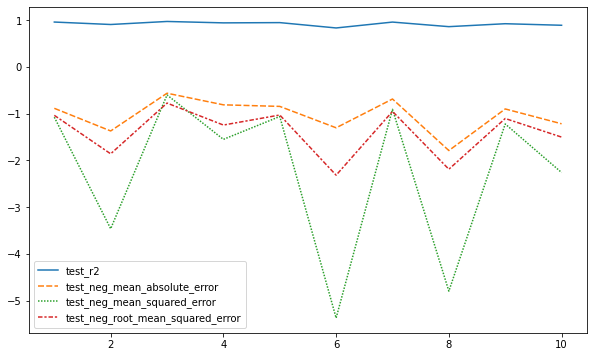

In [145]:
sns.lineplot(data = scores.iloc[:,2:])

In [146]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.915992
test_neg_mean_absolute_error       -1.039070
test_neg_mean_squared_error        -2.231529
test_neg_root_mean_squared_error   -1.402208
dtype: float64

In [147]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9185896601157191
MAE 		: 1.017958660787759
MSE 		: 2.2983900578631653
RMSE 		: 1.5160442136900776


In [154]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [156]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [160]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.503390,0.696016
1,-3.147845,0.689086,0.692826,0.000000
2,0.622117,0.170305,0.464319,0.000000
3,-58.348614,-0.910850,-8.374871,0.000000
4,17.227695,2.723077,4.031027,3.490946
5,-3.875031,0.112909,-0.741322,0.000000
6,14.688014,-0.404686,-0.469719,0.000000
7,0.835494,0.287950,0.737737,0.000000
8,-2.765824,-0.091937,-0.849250,0.000000
9,115.503087,-1.014535,2.498333,0.000000


### Choosing best alpha value with Cross-Validation

In [187]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [188]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.001     , 0.00119192, 0.00138384, 0.00157576, 0.00176768,
       0.0019596 , 0.00215152, 0.00234343, 0.00253535, 0.00272727,
       0.00291919, 0.00311111, 0.00330303, 0.00349495, 0.00368687,
       0.00387879, 0.00407071, 0.00426263, 0.00445455, 0.00464646,
       0.00483838, 0.0050303 , 0.00522222, 0.00541414, 0.00560606,
       0.00579798, 0.0059899 , 0.00618182, 0.00637374, 0.00656566,
       0.0067...
       0.01347475, 0.01366667, 0.01385859, 0.01405051, 0.01424242,
       0.01443434, 0.01462626, 0.01481818, 0.0150101 , 0.01520202,
       0.01539394, 0.01558586, 0.01577778, 0.0159697 , 0.01616162,
       0.01635354, 0.01654545, 0.01673737, 0.01692929, 0.01712121,
       0.01731313, 0.01750505, 0.01769697, 0.01788889, 0.01808081,
       0.01827273, 0.01846465, 0.01865657, 0.01884848, 0.0190404 ,
       0.01923232, 0.01942424, 0.01961616, 0.01980808, 0.02      ]),
        cv=10, max_iter=100000)

In [189]:
lasso_cv_model.alpha_

0.00407070707070707

In [191]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9909740058544518
MAE 		: 0.31082105919085184
MSE 		: 0.23752946188435728
RMSE 		: 0.4873699435586455


In [192]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9874746446349394
MAE 		: 0.4174109509953271
MSE 		: 0.35361788543296463
RMSE 		: 0.5946577885077808


In [195]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,0.487370,0.594658
mae,0.310821,0.417411
mse,0.237529,0.353618
R2,0.990974,0.987475


In [197]:
pd.concat([ls,rs, lss, rcs, lcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,lasso_train,lasso_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,1.454129,1.516044,0.377163,0.678833,0.487370,0.594658
mae,0.186213,0.665959,0.338149,0.482446,1.018355,1.017959,0.243653,0.440447,0.310821,0.417411
mse,0.062968,6.634847,0.297970,0.493743,2.114491,2.298390,0.142252,0.460814,0.237529,0.353618
R2,0.997607,0.764990,0.988677,0.982511,0.919650,0.918590,0.994595,0.983678,0.990974,0.987475


In [173]:
lasso_cv_model.coef_

array([ 5.00398419e+00,  8.29487349e-02,  3.20891895e-01, -4.23939736e+00,
        4.69507467e+00, -4.22750564e-01, -0.00000000e+00,  7.41407075e-02,
        0.00000000e+00,  0.00000000e+00, -7.54842494e-01, -0.00000000e+00,
        0.00000000e+00, -9.72952659e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -2.20010478e-01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  8.96062698e-01,  0.00000000e+00,
        2.78579840e-01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.70686080e-01, -2.52698763e-03, -0.00000000e+00, -0.00000000e+00,
       -5.73342133e-02, -0.00000000e+00, -0.00000000e+00, -2.31579764e-02,
       -0.00000000e+00, -

In [174]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [175]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,13.942084,3.428822,6.503390,0.696016,5.003984
1,-3.147845,0.689086,0.692826,0.000000,0.082949
2,0.622117,0.170305,0.464319,0.000000,0.320892
3,-58.348614,-0.910850,-8.374871,0.000000,-4.239397
4,17.227695,2.723077,4.031027,3.490946,4.695075
5,-3.875031,0.112909,-0.741322,0.000000,-0.422751
6,14.688014,-0.404686,-0.469719,0.000000,-0.000000
7,0.835494,0.287950,0.737737,0.000000,0.074141
8,-2.765824,-0.091937,-0.849250,0.000000,0.000000
9,115.503087,-1.014535,2.498333,0.000000,0.000000


## Elastic net

In [198]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [199]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [200]:
elastic_model.l1_ratio

0.5

In [201]:
elastic_model.alpha

1.0

In [202]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.896125980369787
MAE 		: 1.24848020328436
MSE 		: 2.7335648116611186
RMSE 		: 1.6533495733392616


In [203]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9020164827239767
MAE 		: 1.2006537964645356
MSE 		: 2.766286718146463
RMSE 		: 1.6632157761837347


In [204]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,1.653350,1.663216
mae,1.248480,1.200654
mse,2.733565,2.766287
R2,0.896126,0.902016


In [209]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [210]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.503390,0.696016,5.003984,0.862936
1,-3.147845,0.689086,0.692826,0.000000,0.082949,0.211443
2,0.622117,0.170305,0.464319,0.000000,0.320892,0.000000
3,-58.348614,-0.910850,-8.374871,0.000000,-4.239397,0.290767
4,17.227695,2.723077,4.031027,3.490946,4.695075,0.980991
5,-3.875031,0.112909,-0.741322,0.000000,-0.422751,0.002498
6,14.688014,-0.404686,-0.469719,0.000000,-0.000000,0.000000
7,0.835494,0.287950,0.737737,0.000000,0.074141,0.000000
8,-2.765824,-0.091937,-0.849250,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.498333,0.000000,0.000000,0.000000


In [227]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [228]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.001     , 0.00119192, 0.00138384, 0.00157576, 0.00176768,
       0.0019596 , 0.00215152, 0.00234343, 0.00253535, 0.00272727,
       0.00291919, 0.00311111, 0.00330303, 0.00349495, 0.00368687,
       0.00387879, 0.00407071, 0.00426263, 0.00445455, 0.00464646,
       0.00483838, 0.0050303 , 0.00522222, 0.00541414, 0.00560606,
       0.00579798, 0.0059899 , 0.00618182, 0.00637374, 0.00656566,
       0...
       0.01443434, 0.01462626, 0.01481818, 0.0150101 , 0.01520202,
       0.01539394, 0.01558586, 0.01577778, 0.0159697 , 0.01616162,
       0.01635354, 0.01654545, 0.01673737, 0.01692929, 0.01712121,
       0.01731313, 0.01750505, 0.01769697, 0.01788889, 0.01808081,
       0.01827273, 0.01846465, 0.01865657, 0.01884848, 0.0190404 ,
       0.01923232, 0.01942424, 0.01961616, 0.01980808, 0.02      ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [229]:
elastic_cv_model.alpha_

0.00407070707070707

In [230]:
elastic_cv_model.l1_ratio_

1.0

In [231]:
elastic_cv_model.coef_

array([ 5.00398419e+00,  8.29487349e-02,  3.20891895e-01, -4.23939736e+00,
        4.69507467e+00, -4.22750564e-01, -0.00000000e+00,  7.41407075e-02,
        0.00000000e+00,  0.00000000e+00, -7.54842494e-01, -0.00000000e+00,
        0.00000000e+00, -9.72952659e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -2.20010478e-01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  8.96062698e-01,  0.00000000e+00,
        2.78579840e-01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.70686080e-01, -2.52698763e-03, -0.00000000e+00, -0.00000000e+00,
       -5.73342133e-02, -0.00000000e+00, -0.00000000e+00, -2.31579764e-02,
       -0.00000000e+00, -

In [232]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [233]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,13.942084,3.428822,6.503390,0.696016,5.003984,0.862936,5.003984
1,-3.147845,0.689086,0.692826,0.000000,0.082949,0.211443,0.082949
2,0.622117,0.170305,0.464319,0.000000,0.320892,0.000000,0.320892
3,-58.348614,-0.910850,-8.374871,0.000000,-4.239397,0.290767,-4.239397
4,17.227695,2.723077,4.031027,3.490946,4.695075,0.980991,4.695075
5,-3.875031,0.112909,-0.741322,0.000000,-0.422751,0.002498,-0.422751
6,14.688014,-0.404686,-0.469719,0.000000,-0.000000,0.000000,-0.000000
7,0.835494,0.287950,0.737737,0.000000,0.074141,0.000000,0.074141
8,-2.765824,-0.091937,-0.849250,0.000000,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.498333,0.000000,0.000000,0.000000,0.000000


In [234]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9909740058544518
MAE 		: 0.31082105919085184
MSE 		: 0.23752946188435728
RMSE 		: 0.4873699435586455


In [235]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9874746446349394
MAE 		: 0.4174109509953271
MSE 		: 0.35361788543296463
RMSE 		: 0.5946577885077808


In [236]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,0.487370,0.594658
mae,0.310821,0.417411
mse,0.237529,0.353618
R2,0.990974,0.987475


In [237]:
pd.concat([ls, rs, lss, es, rcs, lcs, ecs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,1.454129,1.516044,1.653350,1.663216,0.377163,0.678833,0.487370,0.594658,0.487370,0.594658
mae,0.186213,0.665959,0.338149,0.482446,1.018355,1.017959,1.248480,1.200654,0.243653,0.440447,0.310821,0.417411,0.310821,0.417411
mse,0.062968,6.634847,0.297970,0.493743,2.114491,2.298390,2.733565,2.766287,0.142252,0.460814,0.237529,0.353618,0.237529,0.353618
R2,0.997607,0.764990,0.988677,0.982511,0.919650,0.918590,0.896126,0.902016,0.994595,0.983678,0.990974,0.987475,0.990974,0.987475


## Grid Search

In [277]:
from sklearn.model_selection import GridSearchCV

In [278]:
elastic_model = ElasticNet(max_iter=100000)

In [279]:
param_grid ={"alpha":[elastic_cv_model.alpha_],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [280]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [281]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.1; total time=   0.1s
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.1; total time=   0.2s
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.1; total time=   0.3s
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.1; total time=   0.2s
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.1; total time=   0.2s
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.1; total time=   0.2s
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.1; total time=   0.2s
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.1; total time=   0.3s
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.1; total time=   0.3s
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.1; total time=   0.2s
[CV] END ............alpha=0.00407070707070707, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.00407070707070707, 

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.00407070707070707],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [282]:
grid_model.best_params_

{'alpha': 0.00407070707070707, 'l1_ratio': 1}

In [283]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.316998,0.057228,0.002504,0.000499,0.004071,0.1,"{'alpha': 0.00407070707070707, 'l1_ratio': 0.1}",-0.455892,-0.600603,-0.584833,-1.057596,-0.381904,-1.465344,-0.385498,-0.488284,-0.650331,-0.326713,-0.639700,0.338634,7
1,0.074400,0.016006,0.002097,0.000301,0.004071,0.5,"{'alpha': 0.00407070707070707, 'l1_ratio': 0.5}",-0.455348,-0.559771,-0.494619,-0.763226,-0.360447,-1.452449,-0.380708,-0.481155,-0.657199,-0.310096,-0.591502,0.315143,6
2,0.094400,0.023683,0.001698,0.000639,0.004071,0.7,"{'alpha': 0.00407070707070707, 'l1_ratio': 0.7}",-0.442913,-0.533700,-0.453543,-0.650830,-0.347157,-1.429743,-0.380921,-0.475644,-0.668875,-0.299135,-0.568246,0.308893,5
3,0.083400,0.020173,0.002002,0.000774,0.004071,0.9,"{'alpha': 0.00407070707070707, 'l1_ratio': 0.9}",-0.423679,-0.501685,-0.426295,-0.559810,-0.340416,-1.400488,-0.385444,-0.436157,-0.659559,-0.273264,-0.540680,0.304746,4
4,0.058896,0.017222,0.002001,0.000448,0.004071,0.95,"{'alpha': 0.00407070707070707, 'l1_ratio': 0.95}",-0.420949,-0.490585,-0.419075,-0.556074,-0.337012,-1.391200,-0.388098,-0.419790,-0.657570,-0.263936,-0.534429,0.304054,3
5,0.050301,0.013305,0.002201,0.000745,0.004071,0.99,"{'alpha': 0.00407070707070707, 'l1_ratio': 0.99}",-0.414618,-0.483520,-0.418661,-0.553191,-0.335699,-1.383854,-0.389011,-0.409454,-0.658084,-0.264150,-0.531024,0.302772,2
6,0.044596,0.011431,0.002201,0.000749,0.004071,1,"{'alpha': 0.00407070707070707, 'l1_ratio': 1}",-0.413477,-0.481719,-0.418967,-0.553052,-0.335280,-1.381636,-0.389771,-0.409253,-0.658363,-0.264522,-0.530604,0.302186,1


In [117]:
# new_model = ElasticNet(alpha =0.01, l1_ratio=1)

## Using Best Model From GridSearch

In [284]:
y_pred = grid_model.predict(X_test)

In [285]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9874746446349394
MAE 		: 0.4174109509953271
MSE 		: 0.35361788543296463
RMSE 		: 0.5946577885077808


## Feature importances with Ridge

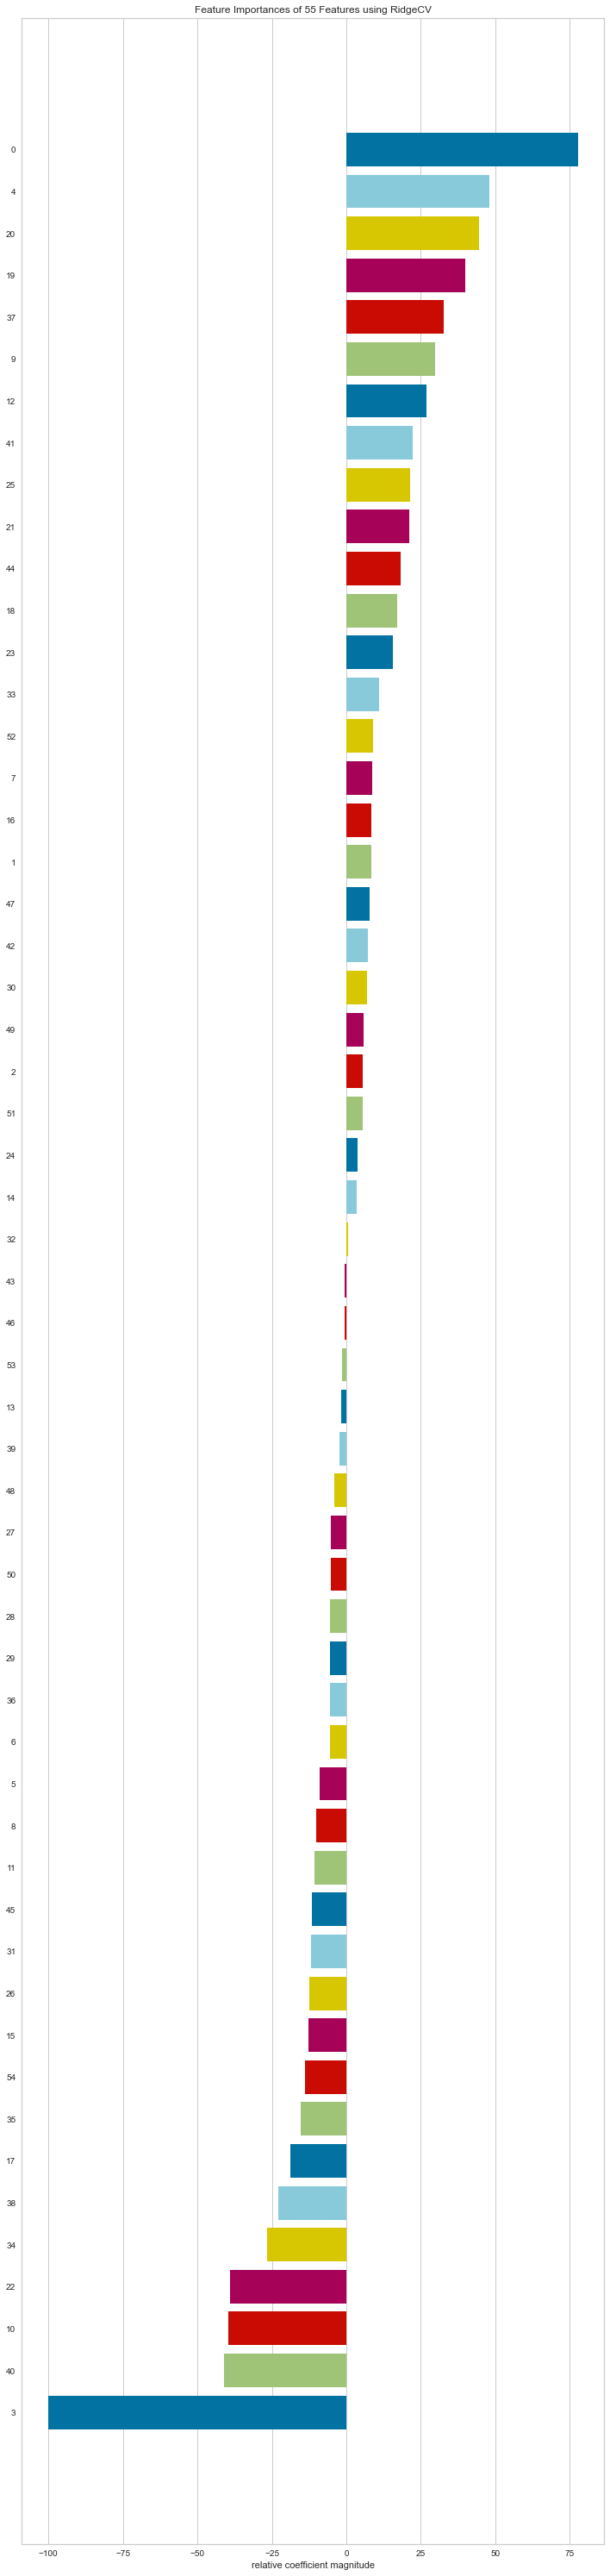

<AxesSubplot:title={'center':'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [258]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Feature importances with Lasso

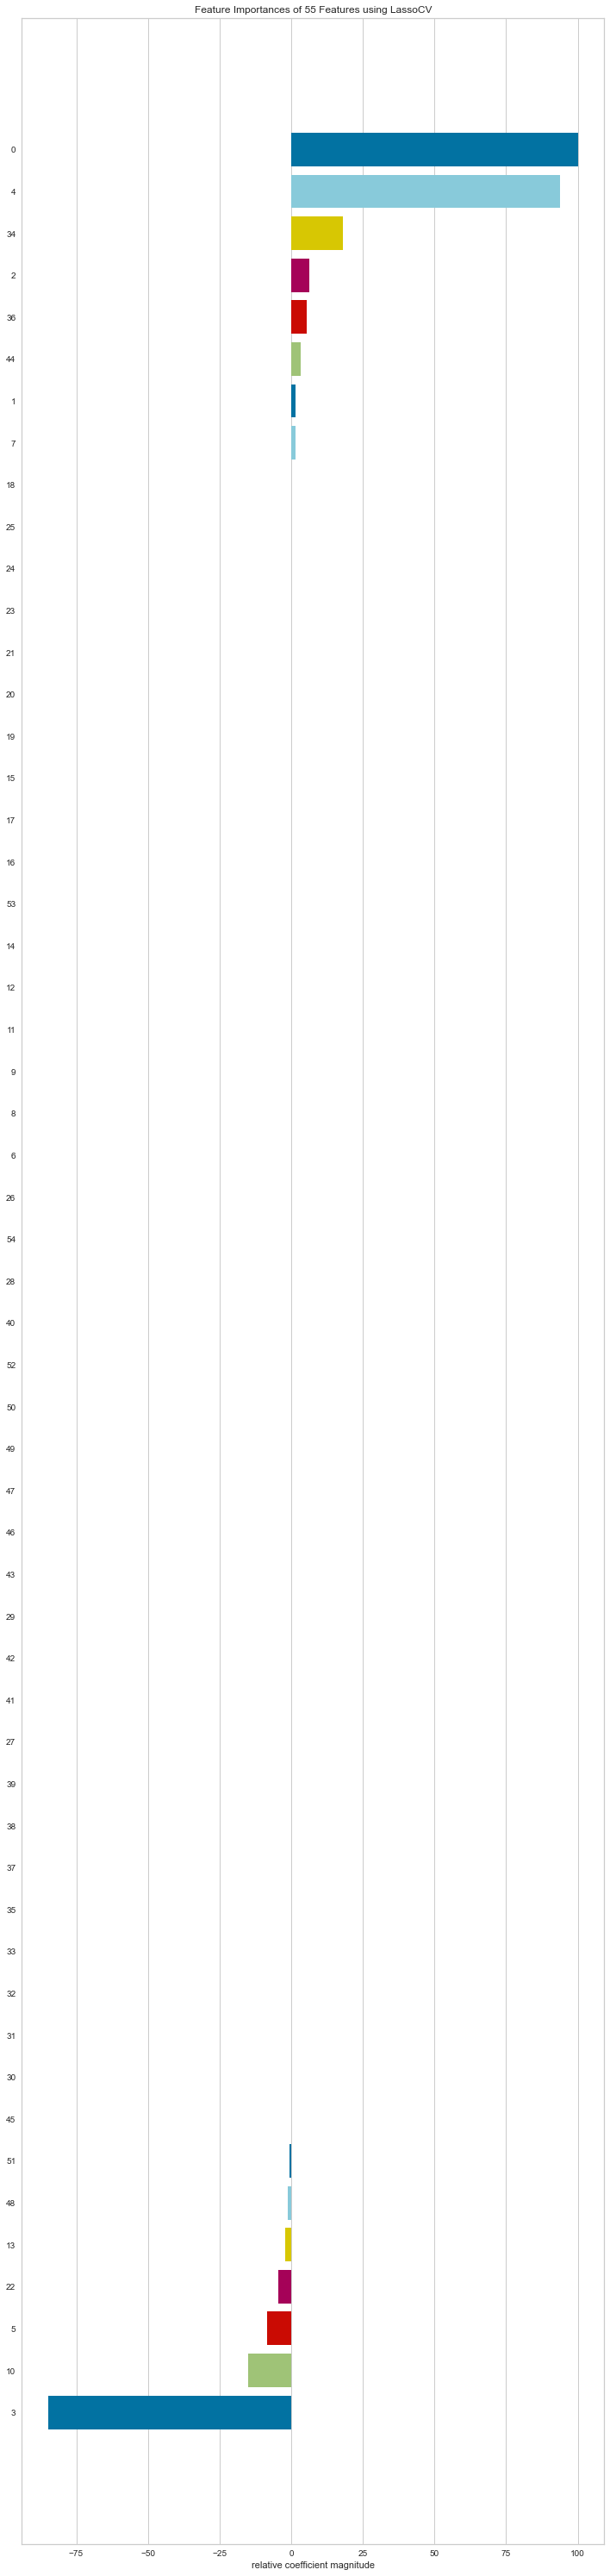

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [260]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()